<a href="https://colab.research.google.com/github/quaocalebfianku/Hamoye-Data-Science-Internship./blob/main/Stage_E_Quiz_Notebook_caleb_fianku_quao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import zipfile
#from google.colab import drive
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import isnan

In [4]:
df = pd.read_csv('/content/stage E/household_power_consumption.txt', sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
#check for missing values
print(df.shape)
df.isnull().sum()

(2075259, 7)


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
#filling missing values with data from the same day of the previous year
def fill_missing(values):
  one_day = 60 *24
  for row in range(values.shape[0]):
    for col in range(values.shape[1]):
      if isnan(values[row,col]):
        values[row, col] = values[row - one_day, col]

In [9]:
df2 = df.fillna(df.mean())

#print(df.isnull().sum())
print(df2.isnull().sum())
#df.head()
df2.head()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
#daily resampling
daily_df = df2.resample('D').sum()
print(daily_df.shape)
daily_df.head(3)


(1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0


In [11]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

#since we have several samples of time series lets define a function that could check for
#stationarity and output the various columns that are stationary in the series.

def adf_test(d_set):
    dftest = adfuller(d_set, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")

#this function takes a time series datframe and checks the columns that are stationary.
def get_stationarity(data):
    for i in data.columns:
        print("Column: ",i)
        print('--------------------------------------')
        adf_test(data[i])


In [12]:
get_stationarity(daily_df)

Column:  Global_active_power
--------------------------------------
Test Statistic            -3.731704
p-value                    0.003689
# Lags                    22.000000
# Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64

Series is Stationary
Column:  Global_reactive_power
--------------------------------------
Test Statistic            -3.825851
p-value                    0.002654
# Lags                    22.000000
# Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64

Series is Stationary
Column:  Voltage
--------------------------------------
Test Statistic            -2.959237
p-value                    0.038881
# Lags                    23.000000
# Observations          1418.000000
Critical Value (1%)       -3.434970
Critical Value (5%)       -2.863580
Critical Val

Text(0, 0.5, 'Sub metering 1')

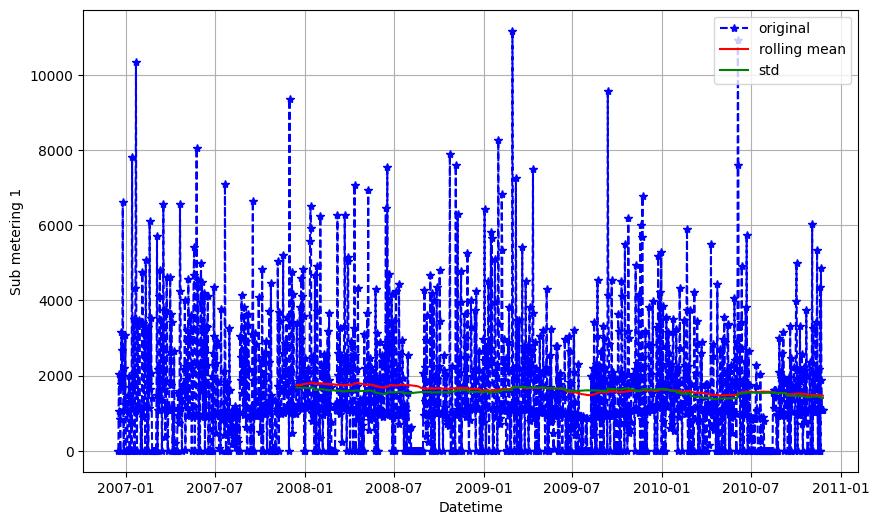

In [13]:
rolling_mean = daily_df.rolling(window = 365).mean()
rolling_std = daily_df.rolling(window = 365).std()

# SUB METERING 1 OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Sub_metering_1,'--', marker='*', color = 'blue',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_1, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_1, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 1')
# you can see that there is no obvious trend or seasonality in the plot.
# Also the mean and the Standard Deviation are constant, which supports the stationarity of the series

Text(0, 0.5, 'Global active power')

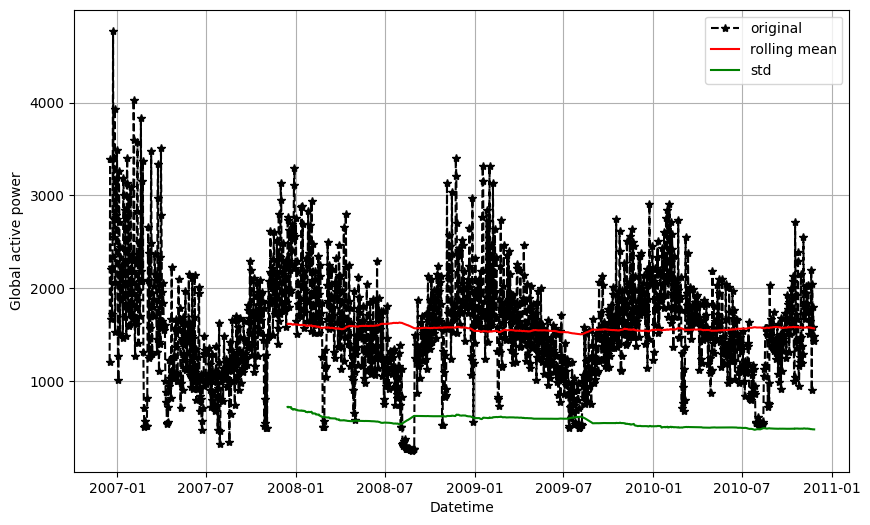

In [14]:
# GLOBAL ACTIVE POWER OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_active_power,'--', marker='*', color = 'black',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_active_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_active_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global active power')
# There is no trend or seasonality in the Global active power from the plot.
# The mean and std are also constant.

Text(0, 0.5, 'Global Reactive Power')

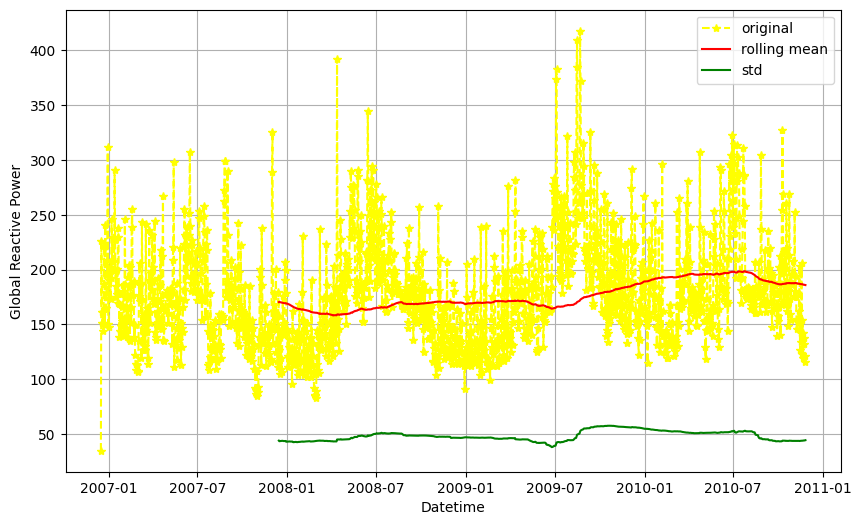

In [15]:
# GLOBAL_REACTIVE_POWER
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_reactive_power,'--', marker='*', color = 'yellow',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_reactive_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_reactive_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global Reactive Power')

Text(0, 0.5, 'Sub metering 2')

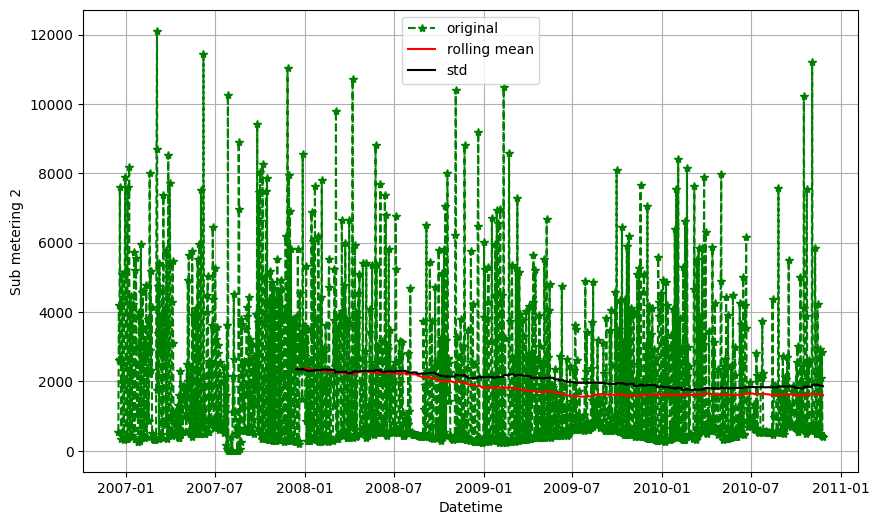

In [16]:
#SUB METERING 2
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Sub_metering_2,'--', marker='*', color = 'green',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_2, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_2, color = 'black', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 2')

Text(0, 0.5, 'Global_intensity')

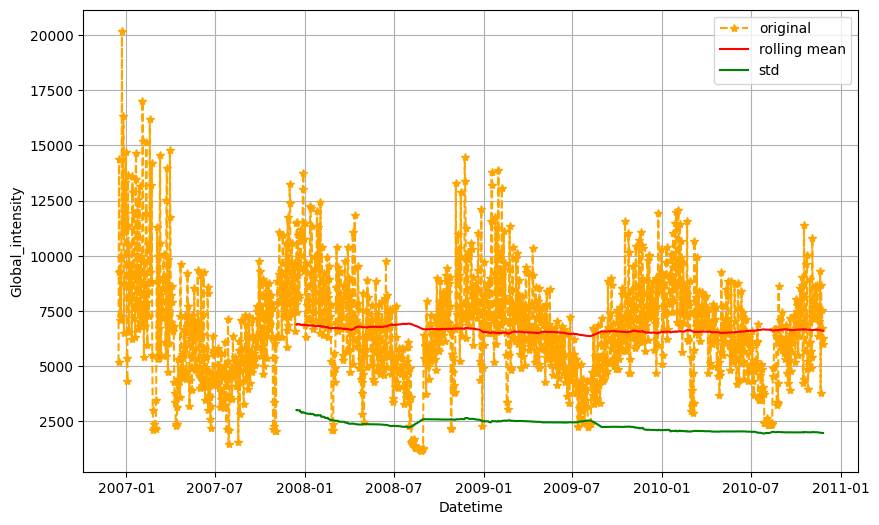

In [17]:
# GLOBAL INTENSITY
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_intensity,'--', marker='*', color = 'orange',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_intensity, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_intensity, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global_intensity')

**Question 11:**

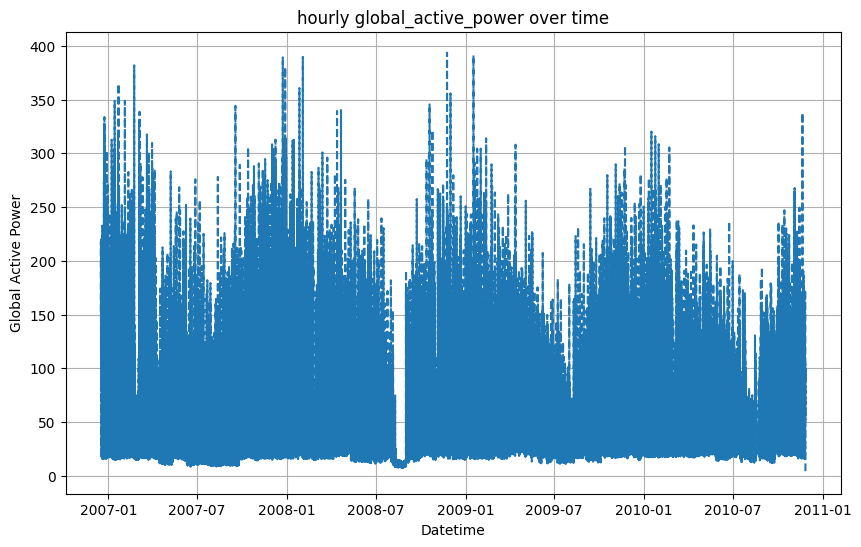

In [21]:
# Hourly resampling for ElecPrice
hourly_df = df2.resample('H').sum()


# Plot of ElecPrice on the hourly time frame
plt.figure(figsize=(10, 6))
plt.plot(hourly_df.index, hourly_df.Global_active_power, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.title('hourly global_active_power over time')
plt.show()

**Question 12**

In [19]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df2['Global_active_power'], df2['Voltage'])

# Print the result rounded to 3 decimal places
print(f"Pearson correlation coefficient between Global Active Power and Voltage: {correlation_coefficient:.3f}")


Pearson correlation coefficient between Global Active Power and Voltage: -0.400


**Question 13**

In [23]:
# Calculate the Pearson correlation coefficient between Voltage and Global_intensity
correlation_coefficient = df2['Voltage'].corr(df2['Global_intensity'])

# Print the result rounded to 2 decimal places
print(f"The Pearson correlation coefficient between Voltage and Global_intensity is: {correlation_coefficient:.2f}")

The Pearson correlation coefficient between Voltage and Global_intensity is: -0.41


In [24]:
!python -m pip install prophet

In [25]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet


In [27]:
# Install additional dependencies
!apt-get install -y --no-install-recommends gcc python3-dev
!pip install setuptools==58.0.3 wheel

# Now try installing fbprophet again
!pip install fbprophet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gcc is already the newest version (4:11.2.0-1ubuntu1).
gcc set to manually installed.
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.5/816.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not instal

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.w

In [31]:
from sklearn.metrics import mean_absolute_error


In [29]:
from prophet import Prophet

In [33]:
#we have to reset the datetime index and assign it as a column in the new dataframe
daily_df.reset_index(inplace=True)
#next we take a slice of the Dataframe columns that would be used to build the prophet model and assign it to a variable
prophet_daily = daily_df[['datetime','Global_active_power']]


In [34]:
#renaming the columns
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [35]:
train_set = prophet_daily.iloc[:1077,:]
test_set = prophet_daily.iloc[1077:,:]
print(train_set.shape)
print(test_set.shape)

(1077, 2)
(365, 2)


In [36]:
#fitting the model to the dataset
p_model = Prophet()
p_model.fit(train_set)
pred = p_model.predict(test_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq35zjr_a/3snr54y4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq35zjr_a/t9_uoptn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44717', 'data', 'file=/tmp/tmpq35zjr_a/3snr54y4.json', 'init=/tmp/tmpq35zjr_a/t9_uoptn.json', 'output', 'file=/tmp/tmpq35zjr_a/prophet_modeldwzpsbf1/prophet_model-20231205153857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:38:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

**Question 14**

In [40]:
mape = Metric(test_set['y'],pred['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is:{round(mape,1)}')

the Mean Average Percentage Error ( MAPE) is:20.9


**Question 15**

In [41]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,1)))

The Root Mean Square Error(rmse) value is : 375.0


**Question 16**

Figure(900x900)


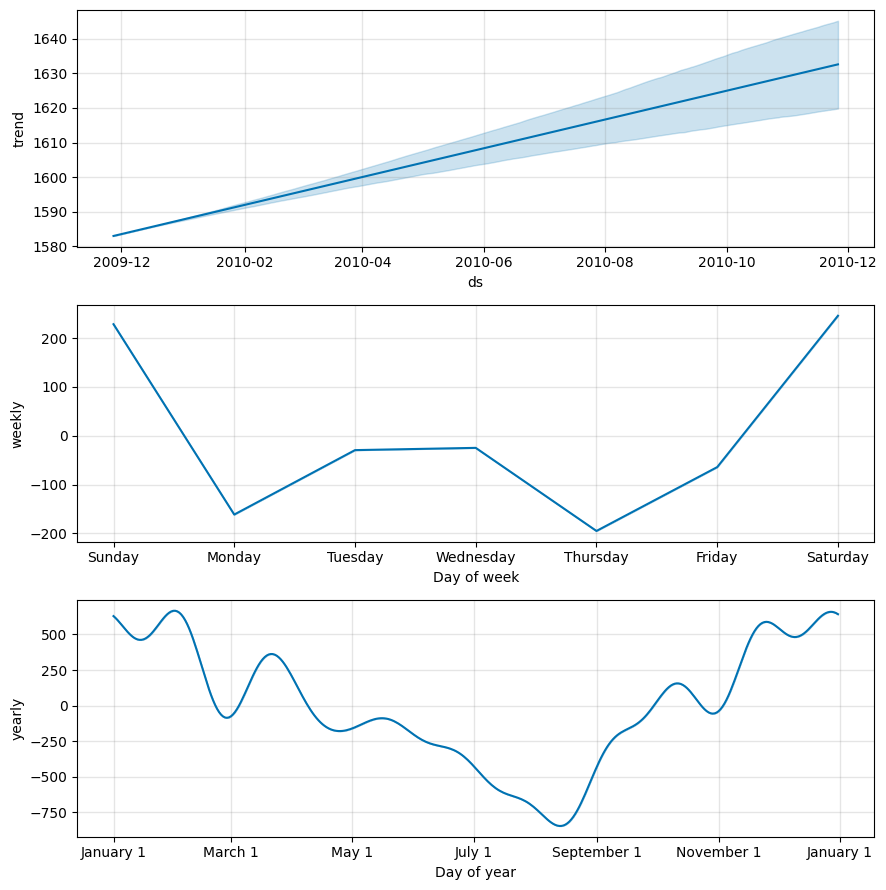

In [44]:
print(p_model.plot_components(pred))
# from the plot of weekly seasonality Thrusday has the lowest value.

In [45]:
# reseting the index column of the daily_df
daily_df.reset_index(inplace = True)
multi_prophet = daily_df
print(multi_prophet.shape)
multi_prophet.head()

(1442, 9)


,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [46]:
# Renaming the columns to prophet name format
multi_prophet = multi_prophet.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [47]:
#checking the renamed dataframe
multi_prophet.head()

,index,ds,y,add1,add2,add3,add4,add5,add6
0,0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [48]:
train_set_multi = multi_prophet.iloc[:1077,:]
test_set_multi = multi_prophet.iloc[1077:,:]
print(train_set_multi.shape)
print(test_set_multi.shape)

(1077, 9)
(365, 9)


In [49]:
# Creating the prophet multivariate model
m_model = Prophet()
m_model.add_regressor('add1')
m_model.add_regressor('add2')
m_model.add_regressor('add3')
m_model.add_regressor('add4')
m_model.add_regressor('add5')
m_model.add_regressor('add6')


In [50]:
# Fitting the model to train set
m_model.fit(train_set_multi)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq35zjr_a/ckdcwrxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq35zjr_a/58sb_bdp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98143', 'data', 'file=/tmp/tmpq35zjr_a/ckdcwrxl.json', 'init=/tmp/tmpq35zjr_a/58sb_bdp.json', 'output', 'file=/tmp/tmpq35zjr_a/prophet_modelsbt3ln0n/prophet_model-20231205154502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Question 17**

In [51]:
# Making prediction with test_set
m_pred = m_model.predict(test_set_multi)

# calculating the MAPE using the previously defined function
mape = Metric(test_set_multi['y'],m_pred['yhat'])
print('The Mean Average Percentage Error ( MAPE) Is:%s' %round(mape,2))

The Mean Average Percentage Error ( MAPE) Is:2.69


**Question 17**

In [53]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set_multi['y']),np.array(m_pred['yhat'])))
print('The Root Mean Square Error(rmse) Value Is : {}'.format(round(rmse,2)))


The Root Mean Square Error(rmse) Value Is : 40.06


**Question 18,19 & 20**

Figure(900x900)


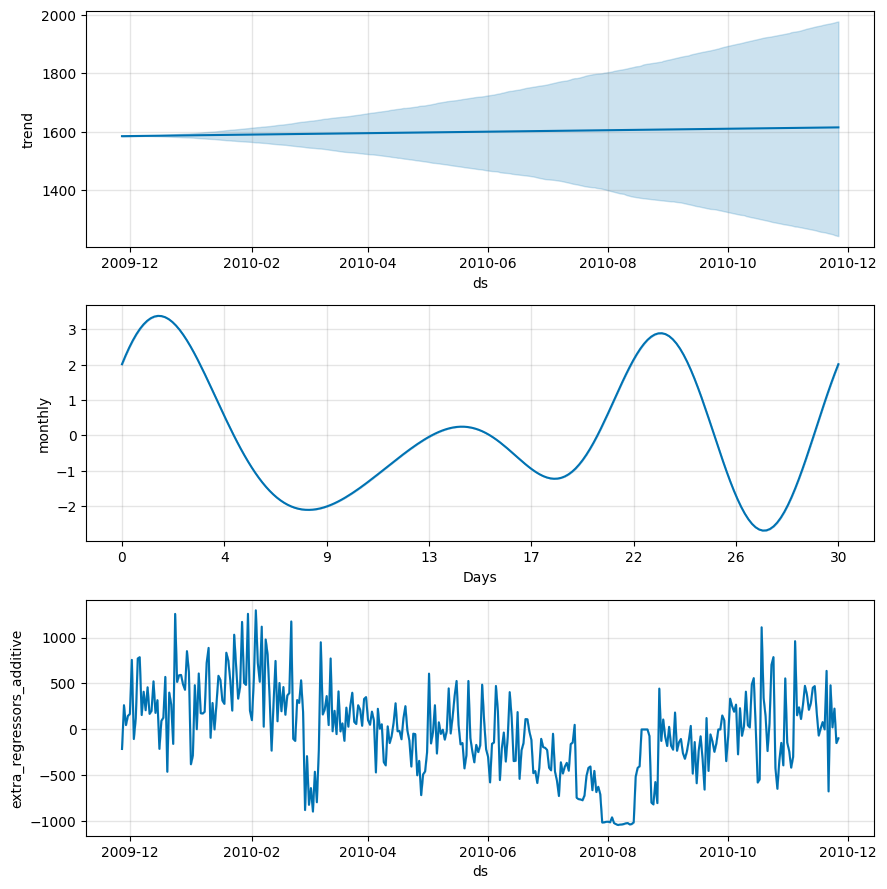

In [65]:
print(m_model.plot_components(m_pred))
#from the plot of the monthly multivariate forecasted model , TUESDAY has the lowest value